In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

In [6]:
annotated_post_df = pd.read_csv("/Users/brittanyharding/LHL-Projects/SM-suicide_detection/annotated_train_df/annotated_post_df_5cat.csv")

### EDA - Check Data Contents

In [5]:
annotated_post_df.head(5)

,identifier,subreddit,post_date,username,post,classification
0,t3_148e1wn,Anxiety,2023-06-13 12:15,AdEffective9235,Setraline: I was on Setraline for 5+ years. Ma...,Immediate Crisis
1,t3_148cyz2,Anxiety,2023-06-13 11:16,POP-RAVEN,Need help with death anxiety: I don't know if ...,Immediate Crisis
2,t3_148afhq,Anxiety,2023-06-13 8:38,Inevitable-Bag-5966,Help: *My anxiety and depression is so bad rig...,Immediate Crisis
3,t3_1486f90,Anxiety,2023-06-13 4:29,Miserable_Treat_5708,Unsure if this is harm ocd: I have bad intrusi...,Immediate Crisis
4,t3_1484t9a,Anxiety,2023-06-13 3:00,Vqnix,I want to go back to the time where I knew wha...,Immediate Crisis


In [77]:
# Get the shape of the DataFrame (number of rows and columns)
print("Shape:", annotated_post_df.shape)
print()

# Check the data types of each column
print("Data Types:")
print(annotated_post_df.dtypes)
print()

# Count the number of posts in each classification
classification_counts = annotated_post_df['classification'].value_counts()
print("Classification Counts:")
print(classification_counts)
print()

# Calculate the percentage of each classification
classification_percentages = annotated_post_df['classification'].value_counts(normalize=True) * 100
print("Classification Percentages:")
print(classification_percentages)
print()

# Explore summary statistics of the post length
post_length_stats = annotated_post_df['post'].str.len().describe()
print("Post Length Summary Statistics:")
print(post_length_stats)

Shape: (2000, 7)

Data Types:
identifier                 object
subreddit                  object
post_date          datetime64[ns]
username                   object
post                       object
classification             object
sentiment_score           float64
dtype: object

Classification Counts:
classification
Struggle/Challenge     703
Support/Advice         509
Mental Distress        406
Immediate Crisis       232
Recovery/Management    150
Name: count, dtype: int64

Classification Percentages:
classification
Struggle/Challenge     35.15
Support/Advice         25.45
Mental Distress        20.30
Immediate Crisis       11.60
Recovery/Management     7.50
Name: proportion, dtype: float64

Post Length Summary Statistics:
count     2000.000000
mean       906.191500
std        923.736514
min         16.000000
25%        336.750000
50%        635.500000
75%       1173.000000
max      10883.000000
Name: post, dtype: float64


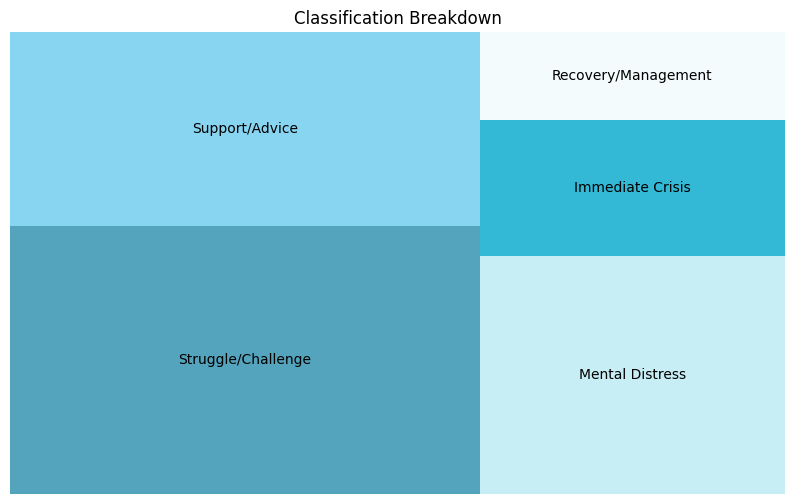

In [105]:
# Define the classification categories and their counts
classification_labels = ['Struggle/Challenge', 'Support/Advice', 'Mental Distress', 'Immediate Crisis', 'Recovery/Management']
classification_counts = [703, 509, 406, 232, 150]

# Calculate the proportion of each category
proportions = [count / sum(classification_counts) for count in classification_counts]

# Assign colors to the rectangles
color_palette = ['#2b8ead', '#6bcbef', '#b9eaf2', '#00a8cc', '#f2fafd']

# Create the treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=proportions, label=classification_labels, color=color_palette, alpha=0.8)

# Add labels
plt.title('Classification Breakdown')
plt.axis('off')

# Show the plot
plt.show()


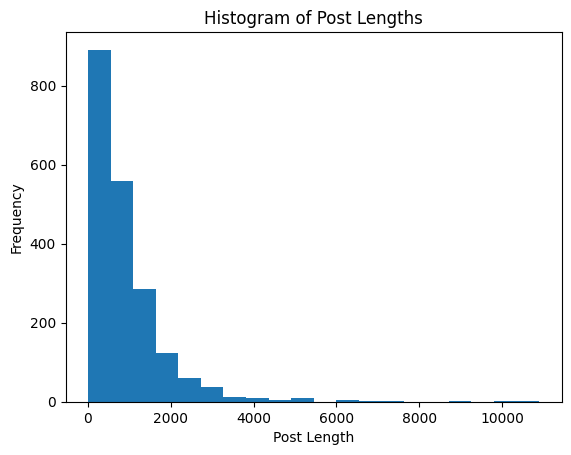

In [7]:
# Plot a histogram of post lengths
plt.hist(annotated_post_df['post'].str.len(), bins=20)
plt.xlabel('Post Length')
plt.ylabel('Frequency')
plt.title('Histogram of Post Lengths')
plt.show()

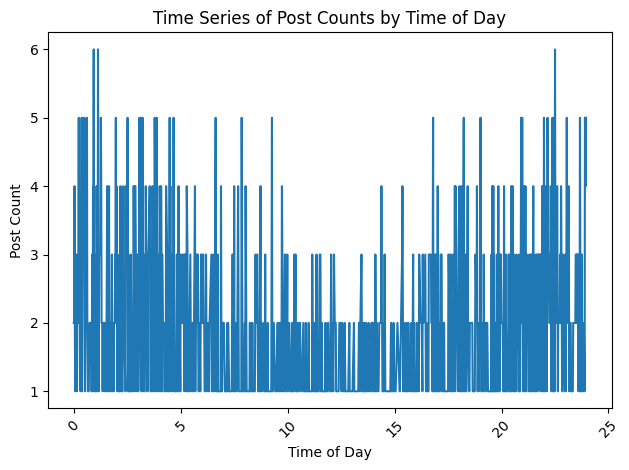

In [110]:
import matplotlib.pyplot as plt

# Extract the time component from 'post_date' and convert it to a numeric format
annotated_post_df['post_time'] = annotated_post_df['post_date'].dt.hour + annotated_post_df['post_date'].dt.minute / 60

# Group the DataFrame by 'post_time' and count the number of posts for each time
post_counts = annotated_post_df.groupby('post_time').size()

# Plot a time series line plot of post counts
plt.plot(post_counts.index, post_counts.values)
plt.xlabel('Time of Day')
plt.ylabel('Post Count')
plt.title('Time Series of Post Counts by Time of Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


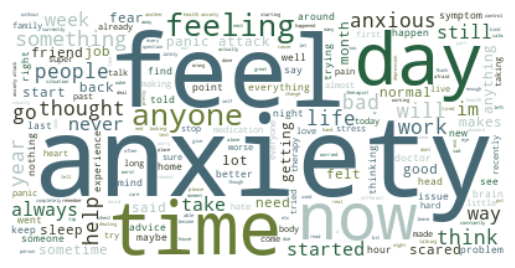

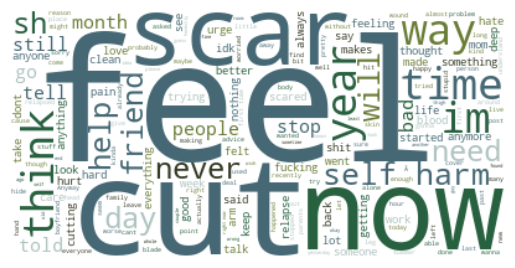

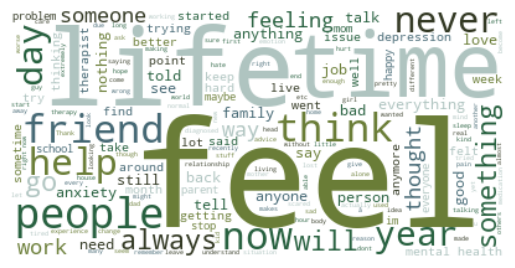

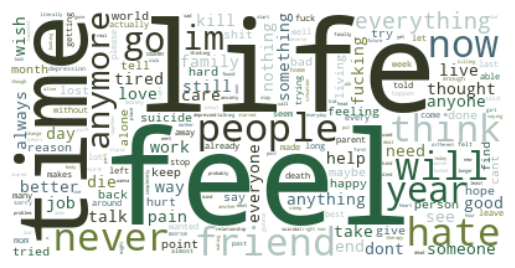

In [9]:
# Define the subreddits for word clouds
subreddits = ['Anxiety', 'selfharm', 'mentalhealth', 'SuicideWatch']

# Define the background color for the word cloud
background_color = '#ffffff'  # Dark blue background

# Define the color palette for the word cloud
color_palette = ['#286140', '#456874', '#6a7d37', '#333924', '#afc4c0']  # Shades of blue

# Define the additional words to be excluded from the word cloud
excluded_words = ['want', 'even', 'know', 'thing', 'things', 'got', 'one', 'really', 'make', 'much', 'going']

# Generate word clouds for each subreddit
for subreddit in subreddits:
    # Filter the data by subreddit
    subreddit_data = annotated_post_df[annotated_post_df['subreddit'] == subreddit]

    # Check if there are posts available
    if len(subreddit_data) > 0:
        # Filter out empty or non-word posts
        subreddit_data = subreddit_data[subreddit_data['post'].str.strip().str.len() > 0]

        # Define the stopwords by combining the default set with the additional excluded words
        stopwords = set(STOPWORDS).union(excluded_words)

        # Preprocess the text by removing the stopwords
        text = ' '.join(subreddit_data['post'])

        # Generate word cloud from preprocessed text with custom color scheme
        wordcloud = WordCloud(
            background_color=background_color,
            stopwords=stopwords
        ).generate(text)

        # Apply the custom color palette to the word cloud
        wordcloud.recolor(color_func=lambda *args, **kwargs: color_palette[np.random.randint(0, len(color_palette))])

        # Set the text color to white for better visibility
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        # plt.title(f'Word Cloud - {subreddit} Subreddit', color='black')  # Set title color to white
        plt.show()
    else:
        print(f"No valid posts available for subreddit: {subreddit}")




In [28]:
subreddit_values = annotated_post_df['subreddit'].unique()
print(subreddit_values)

['selfharm' 'Anxiety' 'mentalhealth' 'SuicideWatch']


### Sentiment Analysis

/var/folders/mh/gw7ldp_51fq3fsmcfkh4750w0000gn/T/ipykernel_49532/3424906828.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_data['sentiment_score'] = subreddit_data['post'].apply(lambda x: sid.polarity_scores(x)['compound'])


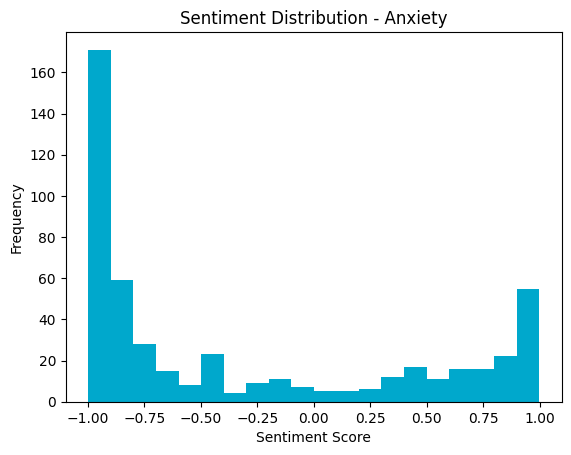

/var/folders/mh/gw7ldp_51fq3fsmcfkh4750w0000gn/T/ipykernel_49532/3424906828.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_data['sentiment_score'] = subreddit_data['post'].apply(lambda x: sid.polarity_scores(x)['compound'])


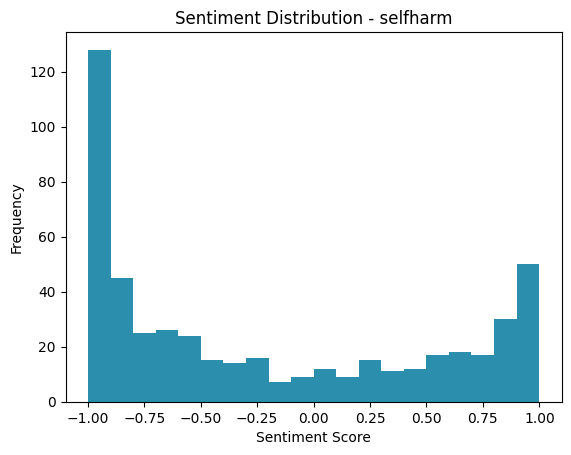

/var/folders/mh/gw7ldp_51fq3fsmcfkh4750w0000gn/T/ipykernel_49532/3424906828.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_data['sentiment_score'] = subreddit_data['post'].apply(lambda x: sid.polarity_scores(x)['compound'])


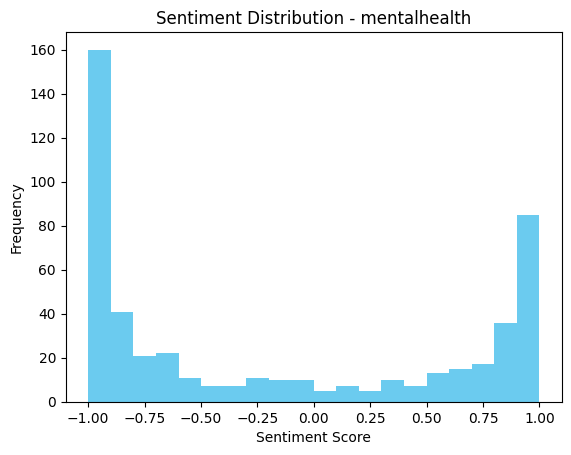

/var/folders/mh/gw7ldp_51fq3fsmcfkh4750w0000gn/T/ipykernel_49532/3424906828.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_data['sentiment_score'] = subreddit_data['post'].apply(lambda x: sid.polarity_scores(x)['compound'])


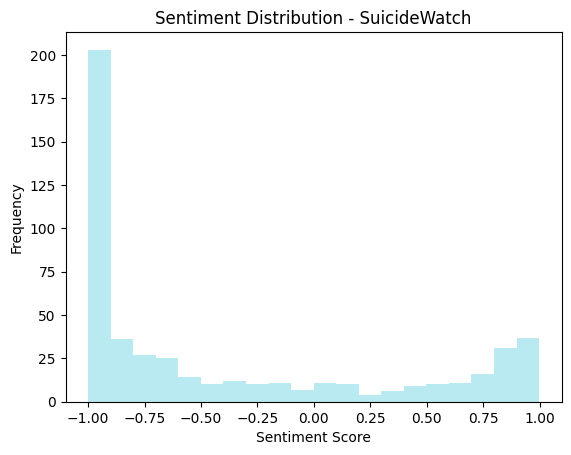

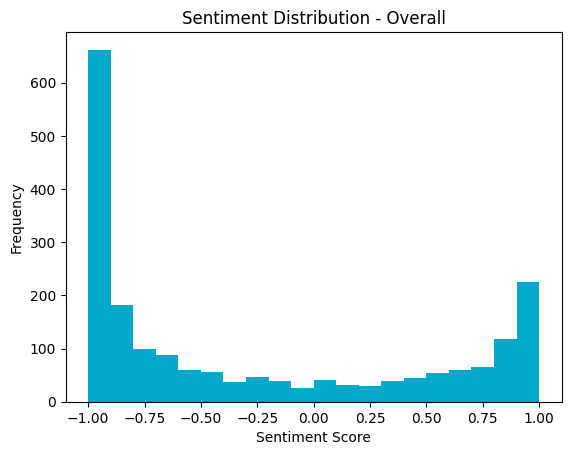

In [74]:
# Define the subreddits for sentiment analysis
subreddits = ['Anxiety', 'selfharm', 'mentalhealth', 'SuicideWatch']

# Define the color palette for the plots
color_palette = ['#00a8cc', '#2b8ead', '#6bcbef', '#b9eaf2', '#f2fafd']  # Shades of blue

# Perform sentiment analysis for each subreddit and plot sentiment distribution
for i, subreddit in enumerate(subreddits):
    # Filter the data by subreddit
    subreddit_data = annotated_post_df[annotated_post_df['subreddit'] == subreddit]

    # Perform sentiment analysis on 'post' column
    sid = SentimentIntensityAnalyzer()
    subreddit_data['sentiment_score'] = subreddit_data['post'].apply(lambda x: sid.polarity_scores(x)['compound'])

    # Plot sentiment distribution with color coding
    plt.hist(subreddit_data['sentiment_score'], bins=20, color=color_palette[i % len(color_palette)])
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.title(f'Sentiment Distribution - {subreddit}')
    plt.show()

# Perform sentiment analysis on the overall dataset and plot sentiment distribution
sid = SentimentIntensityAnalyzer()
annotated_post_df['sentiment_score'] = annotated_post_df['post'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Plot sentiment distribution for the overall dataset
plt.hist(annotated_post_df['sentiment_score'], bins=20, color=color_palette[0])
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution - Overall')
plt.show()


### Topic Modelling

In [75]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
import nltk

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Tokenize, remove stopwords, and lemmatize for topic modeling
def preprocess_text(text):
    return [lemmatizer.lemmatize(token) for token in simple_preprocess(text) if token not in STOPWORDS]

# Apply tokenization, stopword removal, and lemmatization to the 'post' column temporarily
text_data = [preprocess_text(post) for post in annotated_post_df['post']]

# Create a dictionary and corpus from the tokenized data
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(post) for post in text_data]

# Apply LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary)

# Print the topics
for idx, topic in lda_model.print_topics():
    print(f'Topic #{idx + 1}: {topic}\n')


Topic #1: 0.018*"feel" + 0.016*"like" + 0.008*"life" + 0.008*"know" + 0.007*"think" + 0.007*"year" + 0.006*"anxiety" + 0.006*"time" + 0.006*"ve" + 0.006*"thing"

Topic #2: 0.021*"like" + 0.017*"feel" + 0.015*"anxiety" + 0.013*"time" + 0.010*"know" + 0.010*"ve" + 0.008*"life" + 0.008*"year" + 0.007*"day" + 0.006*"help"

Topic #3: 0.012*"want" + 0.012*"know" + 0.011*"life" + 0.011*"time" + 0.010*"like" + 0.008*"feel" + 0.008*"thing" + 0.008*"ve" + 0.007*"year" + 0.006*"day"

Topic #4: 0.020*"like" + 0.018*"want" + 0.018*"feel" + 0.015*"ve" + 0.014*"know" + 0.009*"friend" + 0.008*"life" + 0.008*"year" + 0.007*"time" + 0.007*"going"

Topic #5: 0.017*"like" + 0.016*"feel" + 0.013*"know" + 0.011*"ve" + 0.011*"want" + 0.010*"thing" + 0.008*"day" + 0.008*"people" + 0.007*"thought" + 0.007*"time"



### Sentiment Topic Modelling

In [48]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import contractions

# Initialize lemmatizer and sentiment analyzer
lemmatizer = WordNetLemmatizer()
sid = SentimentIntensityAnalyzer()

# Tokenize, remove stopwords, and lemmatize for topic modeling
def preprocess_text(text):
    # Fix encoding errors by replacing or removing problematic characters
    text = text.encode('ascii', 'ignore').decode('utf-8')
    text = text.replace("*", "")
    text = text.replace("ä", "")
    text = text.replace("ô", "")
    
    # Expand contractions
    expanded_text = contractions.fix(text)
    
    return [lemmatizer.lemmatize(token) for token in simple_preprocess(expanded_text) if token not in STOPWORDS]

# Define the subreddits
subreddits = ['Anxiety', 'selfharm', 'mentalhealth', 'SuicideWatch']

# Combine all posts from different subreddits
combined_posts = []
for subreddit in subreddits:
    subreddit_data = annotated_post_df[annotated_post_df['subreddit'] == subreddit]
    combined_posts.extend(subreddit_data['post'])

# Apply tokenization, stopword removal, and lemmatization to the combined posts
combined_text_data = [preprocess_text(post) for post in combined_posts]

# Create a dictionary and corpus from the tokenized data
dictionary = corpora.Dictionary(combined_text_data)
corpus = [dictionary.doc2bow(post) for post in combined_text_data]

# Apply LDA model with sentiment-based topics per individual subreddit
for subreddit in subreddits:
    subreddit_data = annotated_post_df[annotated_post_df['subreddit'] == subreddit]
    subreddit_text_data = [preprocess_text(post) for post in subreddit_data['post']]
    
    # Assign sentiment labels to each post in the subreddit
    sentiment_labels = [1 if sid.polarity_scores(post)['compound'] >= 0 else 2 for post in subreddit_data['post']]
    
    # Create a dictionary and corpus from the tokenized data
    dictionary = corpora.Dictionary(subreddit_text_data)
    corpus = [dictionary.doc2bow(post) for post in subreddit_text_data]
    
    # Apply LDA model
    lda_model = gensim.models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=10, iterations=100)
    
    # Print the sentiment-based topics for the current subreddit
    print(f"Subreddit: {subreddit}")
    for idx, topic in lda_model.print_topics():
        sentiment_topic = 'Positive' if idx == 0 else 'Negative'
        print(f"Sentiment Topic: {sentiment_topic}")
        print(f"Topic #{idx + 1}: {topic}")
    print()

# Apply LDA model with sentiment-based topics for all subreddits combined
lda_model_combined = gensim.models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=10, iterations=100)

# Print the sentiment-based topics for all subreddits combined
print("Combined Subreddits")
for idx, topic in lda_model_combined.print_topics():
    sentiment_topic = 'Positive' if idx == 0 else 'Negative'
    print(f"Sentiment Topic: {sentiment_topic}")
    print(f"Topic #{idx + 1}: {topic}")

Subreddit: Anxiety
Sentiment Topic: Positive
Topic #1: 0.024*"anxiety" + 0.020*"like" + 0.018*"feel" + 0.011*"know" + 0.010*"time" + 0.008*"day" + 0.007*"thing" + 0.007*"feeling" + 0.007*"going" + 0.006*"thought"
Sentiment Topic: Negative
Topic #2: 0.016*"anxiety" + 0.010*"like" + 0.008*"know" + 0.008*"year" + 0.008*"feel" + 0.008*"time" + 0.007*"want" + 0.007*"work" + 0.007*"life" + 0.006*"day"

Subreddit: selfharm
Sentiment Topic: Positive
Topic #1: 0.015*"want" + 0.014*"know" + 0.014*"scar" + 0.010*"self" + 0.010*"like" + 0.009*"harm" + 0.007*"cut" + 0.006*"time" + 0.006*"friend" + 0.006*"told"
Sentiment Topic: Negative
Topic #2: 0.026*"like" + 0.022*"feel" + 0.019*"know" + 0.015*"cut" + 0.015*"want" + 0.011*"time" + 0.007*"thing" + 0.007*"clean" + 0.006*"think" + 0.006*"day"

Subreddit: mentalhealth
Sentiment Topic: Positive
Topic #1: 0.017*"like" + 0.015*"feel" + 0.013*"know" + 0.010*"time" + 0.010*"want" + 0.008*"thing" + 0.008*"people" + 0.007*"day" + 0.007*"think" + 0.006*"year